In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
#import dataset
data = pd.read_csv('processed_data.csv')

In [6]:
data.head()

,label,subject,email_to,email_from,message
0,1,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,0,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,1,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,1,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...


In [7]:
data.shape

(75419, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75419 entries, 0 to 75418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       75419 non-null  int64 
 1   subject     74626 non-null  object
 2   email_to    74843 non-null  object
 3   email_from  75419 non-null  object
 4   message     73932 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [9]:
#drop unwanted columns
data.drop(columns = ['subject', 'email_to', 'email_from'],inplace = True)

In [10]:
#rename columns Label to label and message to email
data.rename(columns = {'Label':'label','message':'email'},inplace=True)

In [11]:
data.head()

,label,email
0,1,Content-Type: text/html;\nContent-Transfer-Enc...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,"Hey Billy, \n\nit was really fun going out the..."
4,1,Content-Type: multipart/alternative;\n ...


In [12]:
data['label'].value_counts()

1    50199
0    25220
Name: label, dtype: int64

In [13]:
#check sum of null values
data.isnull().sum()

label       0
email    1487
dtype: int64

In [14]:
#drop null values
data = data.dropna(axis=0)

In [15]:
data.isnull().sum()

label    0
email    0
dtype: int64

In [16]:
#check the sum of duplicates
data.duplicated().sum()

14883

In [17]:
#drop the duplicates keeping the first one 
data = data.drop_duplicates(keep='first')

In [18]:
data.duplicated().sum()

0

In [19]:
data.shape

(59049, 2)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59049 entries, 0 to 75418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   59049 non-null  int64 
 1   email   59049 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [21]:
data['email'].describe()

count                                                 59049
unique                                                59047
top       Content-Type: text/html;\n\tcharset="us-ascii"...
freq                                                      2
Name: email, dtype: object

In [22]:
data['label'].describe()

count    59049.000000
mean         0.585209
std          0.492690
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [23]:
data['label'].value_counts()

1    34556
0    24493
Name: label, dtype: int64

In [24]:
#dataframe with only ham emails
df1 = data[data.label != 1]

In [25]:
#dataframe with only spam emails
df2 = data[data.label != 0]

In [26]:
#concatenate the two dataframe and form new dataframe with balanced data
df = pd.concat([df1,df2[:24000]])

In [27]:
# df = data

In [28]:
df1.head()

,label,email
1,0,"Hi, i've just updated from the gulus and I che..."
9,0,Hi...\n\nI have to use R to find out the 90% c...
19,0,Hm... sounds like a homework problem to me...\...
20,0,Gruesse!\n* V.Harishankar schrieb am [08.04.07...
28,0,"Daer r-helpers,\n\nCan anyone help with the fo..."


In [29]:
df2.head()

,label,email
0,1,Content-Type: text/html;\nContent-Transfer-Enc...
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,"Hey Billy, \n\nit was really fun going out the..."
4,1,Content-Type: multipart/alternative;\n ...
5,1,Content-Type: multipart/alternative;\n ...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48493 entries, 1 to 53432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   48493 non-null  int64 
 1   email   48493 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [31]:
df['label'].value_counts()

0    24493
1    24000
Name: label, dtype: int64

In [32]:
df.isnull().sum()

label    0
email    0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
encoder = LabelEncoder()

In [35]:
df['label'] = encoder.fit_transform(df['label'])

<AxesSubplot:>

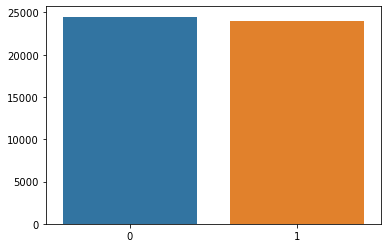

In [36]:
sns.barplot(x=df.label.value_counts().index, y=df.label.value_counts().values)

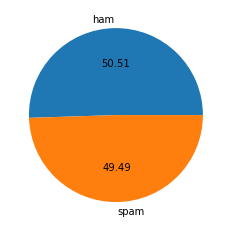

In [37]:
plt.pie(df['label'].value_counts(),labels =['ham','spam'],autopct="%0.2f")
plt.show()

In [38]:
df['length'] = df.email.str.len()
df.head()

,label,email,length
1,0,"Hi, i've just updated from the gulus and I che...",728
9,0,Hi...\n\nI have to use R to find out the 90% c...,990
19,0,Hm... sounds like a homework problem to me...\...,1162
20,0,Gruesse!\n* V.Harishankar schrieb am [08.04.07...,778
28,0,"Daer r-helpers,\n\nCan anyone help with the fo...",2089


In [39]:
def lower_case(text):
    return text.lower()
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',text)
    return text
def remove_whitespace(text):
    return re.sub(r'^\s+|\s+?$', '',text)

In [40]:
stopword_list = stopwords.words("english")

In [41]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
def text_preprocessing(text):
    # word tokenizing
    tokens = nltk.word_tokenize(text)

    # removing noise: numbers, stopwords, and punctuation
    stopwords_list = stopwords.words("english")
    tokens = [token for token in tokens if not token.isdigit() and \
                            not token in string.punctuation and \
                                token not in stopwords_list]
    
    #Lemmatizating the tokens using wordnet lemmatizer
    n = nltk.WordNetLemmatizer()
    tokens = [n.lemmatize(token) for token in tokens]

    # join tokens and form string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

In [43]:
df['email'] =df['email'].apply(lower_case)

In [44]:
df['email'] =df['email'].apply(remove_square_brackets)

In [45]:
df['email'] =df['email'].apply(remove_special_characters)

In [46]:
df['email'] =df['email'].apply(remove_whitespace)

In [47]:
df['email'] =df['email'].apply(text_preprocessing)

In [48]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.email.str.len()
df.head()

,label,email,length,clean_length
1,0,hi ive updated gulu check mirror seems little ...,728,510
9,0,hi use r find confidenceinterval sensitivity s...,990,643
19,0,hm sound like homework problem maybe start fig...,1162,725
20,0,gruesse vharishankar schrieb problem hp compaq...,778,508
28,0,daer rhelpers anyone help following get mcmcsa...,2089,1116


In [49]:
df.email[1]

'hi ive updated gulu check mirror seems little typo debianreadme file example httpgulususherbrookecadebianreadme ftpftpfrdebianorgdebianreadme testing lenny access release diststesting current tested development snapshot named etch package tested unstable passed automated test propogate release etch replace lenny like readmehtml yan morin consultant en logiciel libre yanmorinsavoirfairelinuxcom unsubscribe email debianmirrorsrequestlistsdebianorg subject unsubscribe trouble contact listmasterlistsdebianorg'

In [50]:
# wordcloud for representing text data in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud
wc =WordCloud(width = 500,height=500,min_font_size =10,background_color='white')

In [51]:
#wordcloud for spam label
spam_wc = wc.generate(df[df['label']==1]['email'].str.cat(sep=" "))

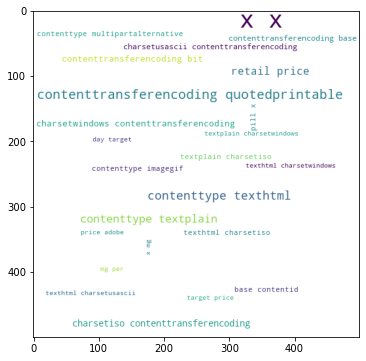

In [52]:
plt.figure(figsize =(15,6))
plt.imshow(spam_wc)

In [53]:
#wordcloud for ham label
ham_wc = wc.generate(df[df['label']==0]['email'].str.cat(sep=" "))

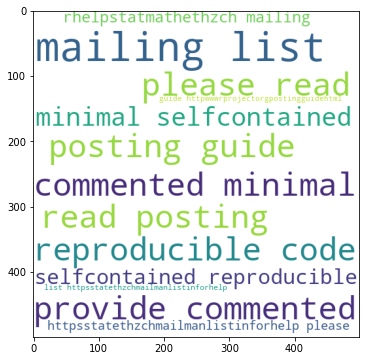

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
spam_corpus = []
for email in df[df['label']==1]['email'].tolist():
    for word in email.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

4969257

C:\Users\pragy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'x'),
  Text(1, 0, 'contenttype'),
  Text(2, 0, 'contenttransferencoding'),
  Text(3, 0, 'price'),
  Text(4, 0, 'quotedprintable'),
  Text(5, 0, 'texthtml'),
  Text(6, 0, 'textplain'),
  Text(7, 0, 'one'),
  Text(8, 0, 'product'),
  Text(9, 0, 'retail'),
  Text(10, 0, 'said'),
  Text(11, 0, 'anatrim'),
  Text(12, 0, 'u'),
  Text(13, 0, 'day'),
  Text(14, 0, 'charsetiso'),
  Text(15, 0, 'see'),
  Text(16, 0, 'bit'),
  Text(17, 0, 'pill'),
  Text(18, 0, 'may'),
  Text(19, 0, 'per'),
  Text(20, 0, 'company'),
  Text(21, 0, 'adobe'),
  Text(22, 0, 'charsetwindows'),
  Text(23, 0, 'get'),
  Text(24, 0, 'customer'),
  Text(25, 0, 'new'),
  Text(26, 0, 'know'),
  Text(27, 0, 'time'),
  Text(28, 0, 'people'),
  Text(29, 0, 'like')])

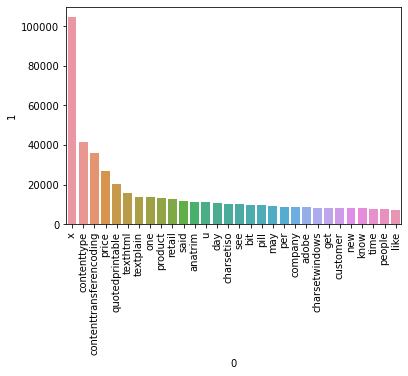

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [58]:
ham_corpus = []
for email in df[df['label']==0]['email'].tolist():
    for word in email.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

5350202

C:\Users\pragy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'email'),
  Text(1, 0, 'list'),
  Text(2, 0, 'new'),
  Text(3, 0, 'please'),
  Text(4, 0, 'code'),
  Text(5, 0, 'may'),
  Text(6, 0, 'c'),
  Text(7, 0, 'r'),
  Text(8, 0, 'u'),
  Text(9, 0, 'one'),
  Text(10, 0, 'use'),
  Text(11, 0, 'news'),
  Text(12, 0, 'mailing'),
  Text(13, 0, 'would'),
  Text(14, 0, 'file'),
  Text(15, 0, 'read'),
  Text(16, 0, 'wrote'),
  Text(17, 0, 'return'),
  Text(18, 0, 'story'),
  Text(19, 0, 'time'),
  Text(20, 0, 'get'),
  Text(21, 0, 'message'),
  Text(22, 0, 'work'),
  Text(23, 0, 'like'),
  Text(24, 0, 'unsubscribe'),
  Text(25, 0, 'contenttype'),
  Text(26, 0, 'provide'),
  Text(27, 0, 'day'),
  Text(28, 0, 'make'),
  Text(29, 0, 'data')])

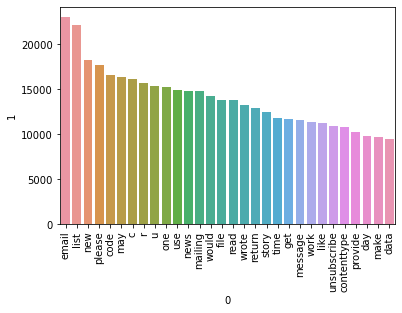

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [61]:
X = df['email']
y = df['label']

In [62]:
# splitting the dataset into training and testing sets with test size = 0.2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
y_train.head()

32486    0
65646    0
10436    1
9959     0
23667    1
Name: label, dtype: int64

In [64]:
y_test.head()

2228     0
2639     1
4420     0
20095    0
50935    0
Name: label, dtype: int64

In [65]:
X_train.head()

32486    started didnt read rest many post tried variet...
65646    hakim cassimally skribis releasing language wi...
10436    contenttype multipartalternative boundaryms m ...
9959     author metze date mon apr new revision websvn ...
23667    contenttype multipartalternative boundaryms m ...
Name: email, dtype: object

In [66]:
print(X_train.shape)
print(X_test.shape)

(38794,)
(9699,)


In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

In [68]:
#fit the training emails into tfidf
tfidf.fit(X_train)

TfidfVectorizer()

In [69]:
#transform the fitted data with tfidf transform
X_train_data = tfidf.transform(X_train)

In [70]:
X_train_data.shape

(38794, 925076)

In [71]:
X_train_data

<38794x925076 sparse matrix of type '<class 'numpy.float64'>'
	with 5119493 stored elements in Compressed Sparse Row format>

In [72]:
#transform the testing data with tfidf
X_test_data = tfidf.transform(X_test)

In [73]:
X_test_data

<9699x925076 sparse matrix of type '<class 'numpy.float64'>'
	with 1074858 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [75]:
mnb = MultinomialNB()

In [76]:
#multinomial naive bayes model fitting
mnb.fit(X_train_data,y_train)
y_pred =mnb.predict(X_test_data)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9683472522940509
[[4792   24]
 [ 283 4600]]
0.9948096885813149


In [77]:
#classification report for multinomial naive bayes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4816
           1       0.99      0.94      0.97      4883

    accuracy                           0.97      9699
   macro avg       0.97      0.97      0.97      9699
weighted avg       0.97      0.97      0.97      9699



In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [79]:
svc = SVC(kernel='rbf', gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [81]:
#model fitting of support vector machine
svc.fit(X_train_data,y_train)
y_pred_svc =svc.predict(X_test_data)
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
print(precision_score(y_test,y_pred_svc))

0.9946386225384061
[[4774   42]
 [  10 4873]]
0.9914547304170905


In [82]:
#classification report for support vector machine
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4816
           1       0.99      1.00      0.99      4883

    accuracy                           0.99      9699
   macro avg       0.99      0.99      0.99      9699
weighted avg       0.99      0.99      0.99      9699



In [83]:
#model fitting of random forest 
rfc.fit(X_train_data,y_train)
y_pred_rfc =rfc.predict(X_test_data)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.989586555314981
[[4775   41]
 [  60 4823]]
0.9915707236842105


In [84]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4816
           1       0.99      0.99      0.99      4883

    accuracy                           0.99      9699
   macro avg       0.99      0.99      0.99      9699
weighted avg       0.99      0.99      0.99      9699



In [85]:
#training and testing accuracy of the multinomial naive bayes 
print('Train acc: ',accuracy_score(y_train, mnb.predict(X_train_data)))
print('Test acc: ', accuracy_score(y_test, y_pred))

Train acc:  0.9768263133474249
Test acc:  0.9683472522940509


In [86]:
#training and testing accuracy of the support vector machine 
print('Train acc: ',accuracy_score(y_train, svc.predict(X_train_data)))
print('Test acc: ', accuracy_score(y_test, y_pred_svc))

Train acc:  0.9985307006238078
Test acc:  0.9946386225384061


In [87]:
#training and testing accuracy of the random forest
print('Train acc: ',accuracy_score(y_train, rfc.predict(X_train_data)))
print('Test acc: ', accuracy_score(y_test, y_pred_rfc))

Train acc:  0.9998195597257308
Test acc:  0.989586555314981


In [88]:
example=["Hi Thanks for working with us. Your bill for $373.75 was due on 28 Aug 2016.If youve already paid it please ignore this email and sorry for bothering you. If youve not paid it please do so as soon as possible. To view your bill visit https:in.xero.com5LQDhRwfvoQfeDtLDMqkk1JWSqC4CmJt4VVJRsGN. If you've got any questions or want to arrange alternativepayment don't hesitate to get in touch.ThanksNJW Limited",
         "congratualtions you've won","hello!! @ @rachita, how are you i hope you ar fine. I wanted you to come to the college gathering on 20th of december at himalayan Hotel. ",
         "free buy 1 get 2 freee now"]

In [89]:
example_tfidf= tfidf.transform(example)
predictions = mnb.predict(example_tfidf)

In [90]:
predictions

array([0, 0, 0, 1], dtype=int64)

In [91]:
predictions = svc.predict(example_tfidf)

In [92]:
predictions

array([1, 1, 1, 1], dtype=int64)

In [93]:
predictions = rfc.predict(example_tfidf)

In [94]:
predictions

array([0, 1, 1, 1], dtype=int64)

In [98]:
text1 = [
"hi",
"Hi, Thanks for working with us. Your bill for $373.75 was due on 28 Aug 2016.If you've already paid it, please ignore this email and sorry for bothering you. If you've not paid it, please do so as soon as possible. To view your bill visit https://in.xero.com/5LQDhRwfvoQfeDtLDMqkk1JWSqC4CmJt4VVJRsGN. If you've got any questions, or want to arrange alternativepayment don't hesitate to get in touch.ThanksNJW Limited",
"Dear User, All Hotmail customers have been upgraded to Outlook.com.Your Hotmail Account services has expired.Due to our system upgrade to outlook. In order for it to remain active follow the link Sign in Re-activate your accountto Outlook. https://account.live.comThanks,The Microsoft account team",
"Hello, We assessed the 2015 payment structure as provided for under the terms of employment and discovered that you are due for a salary raise starting August 2015.Your salaru raise documetn are enclosed below:Access the documents hereFaithfully Human Resources ",
"I hope you had a wonderful week! I'm Kate, the Community Coordinator here at Codesmith, and I'm so excited to share this week's many updates, from the announcement of a full scholarship for our prep programs, to new videos posted to our YouTube channel, and a busy schedule of weekly events. New Scholarship: $10K for 10K",
"We live in a world where certain skills are more highly-paid than others. Copywriting is the ultimate high income skill. By leveraging the power of words, you can magically increase sales for your affiliate campaigns or your clients.  In fact, my friend Kenneth Yu regularly commands USD10,000 - USD25,000 fees for a 2 week project, working only till noon most days. He’s opened up a free 5-day training on his Holy Grail Copywriting method to accomplish exactly that. And he’s inviting YOU to be part of it.",
"hello!! @ @rachita, how are you i hope you ar fine. I wanted you to come to the college gathering on 20th of december at himalayan Hotel. ",
"As one last reminder: On February 1, 2022, we'll introduce a limit of three collaborative FigJam files in the team space for teams on the Starter plan. Teams with more than three collaborative FigJam files will retain their files, but cannot create any more.In your drafts, you can continue to create unlimited FigJam files for personal use. Rest assured that no existing FigJam files or co-editors will be deleted, moved, or impacted.If you're working on a team and need to collaborate on more than three files, upgrading to our Professional plan may be for you",
"Hi there,Last Wednesday, a security researcher working under our bug bounty program found a way that they could access one account's file storage from another by using the Dirty Pipe Linux kernel vulnerability. We put a mitigation system in place to stop that from happening, and then on Thursday we were able to patch the underlying issue. On Friday, another researcher found a similar issue, which the mitigation system we'd put in place originally made relatively harmless -- we were able to patch that one within minutes.It's important to note that none of the credit card numbers or PayPal information used to pay for PythonAnywhere accounts was at risk from these issues; that data is stored on completely different servers, and is not accessible even to us.From our initial analysis, we have no indication that anyone else was able to use these vulnerabilities. It seems to us that this is a case where our bug bounty program worked just as it should, with white hat security researchers telling us about problems before black hat hackers were able to exploit them. However, we're conducting further in-depth investigations to see if there is any evidence of other people using them, and we will let you know if we discover anything.In the meantime, as a precaution, we recommend that you rotate any private keys, API tokens, or passwords that you store in your PythonAnywhere account.All the best,The PythonAnywhere team",
"A million packages waiting for you With CodeSandbox, you can create real projects—from static sites and components, to full-stack web apps. In fact, you can add any of the 1M+ npm packages to your project.From the dashboard, select a recent project and it'll open in the editor. Click 'Add Dependency', type the name of the module you want to use, for example 'underscore', and select the relevant result. It'll automatically be added to your project and the package.json file gets updated too.Add a Dependency Pro tip: If you click on the name of a dependency in the editor it opens a page listing popular sandboxes that use it. It's handy for learning how to implement the package in your own code.Happy coding!The CodeSandbox Team",
"Here’s what we’ve worked on since our official launch day. We...Introduced better caching and improved site monitoring.Replaced our cloud management software with a better tool.Fixed lots of small bugs with the site.Today, Font Awesome 6 is in good shape, our site is stable, and we think you’ll agree that despite the rocky launch day, this is our best release to date!If you have any trouble finding what you’re looking for or if you uncover any bugs along the way, please let us know, and we’ll get on it right away.Give Font Awesome 6 another shot, and check out our new site!",
"Hi Rachita Basnet! We’re thrilled to hear you’ve found our free resume builder, and we know it will help you find a job within your target industry.We built this resume builder with the best of our experience in resume writing to enable you to get an instant custom resume that matches your skills, experiences, qualifications and education.",
"May 19, 2007 05:15 AM EDT Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features TOP STORIES CNN.com Blasts hit Green Zone as Blair makes farewell visit Three explosions rocked Baghdad's heavily fortified Green Zone hours onSaturday after British Prime Minister Tony Blair arrived for meetings withIraqi government leaders, officials said. FULL STORY WATCH VIDEO Afghan bomb kills 3 German troops A suicide bomber killed three German soldiers and four civilians on Saturdayin the northern Afghan province of Kunduz, Afghan security officials said. FULL STORY WATCH VIDEO Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features WEATHER CNN.com/WEATHER Your personalized weather is temporarily out of service. In the meantime, go to for your local weather forecast. Personalized weather will return soon. Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features U.S. CNN.com/US Shipwreck yields historic riches -- $500M worth Deep-sea explorers said Friday they have mined what could be the richestshipwreck treasure in history, bringing home 17 tons of colonial-era silverand gold coins from an undisclosed site in the Atlantic Ocean. FULL STORY Flights halted at bombing range linked to N.J. wildfires Military officials announced Friday they were suspending training at an aerialbombing range where a flare dropped from a military jet may have caused a27-square mile wildfire. FULL STORY WATCH VIDEO Navy lawyer convicted of leaking Guantanamo names A military jury recommended that a Navy lawyer spend six months in prison andbe dismissed from the service for sending a human rights attorney the names of550 Guantanamo Bay detainees in an unmarked Valentine's Day card. FULL STORY Canadian military aerobatic jet crashes, killing pilot A Canadian Forces Snowbirds jet crashed Friday during rehearsal for weekendperformances at Malmstrom Air Force Base, killing the pilot, the FederalAviation Administration said. FULL STORY Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features WORLD CNN.com/WORLD Israeli strikes in Gaza could grow harsher, envoy warns Israel's response to rockets launched from Gaza into its cities has been measured so far but could grow harsher if the attacks continue, Israel'sambassador to the United States said Friday. FULL STORY WATCH VIDEO Four arrested in Iraq 'honor killing' Authorities in northern Iraq have arrested four people in connection with the honor killing last month of a Kurdish teen -- a startling, morbid pummelingcaught on a mobile phone video camera and broadcast around the world. FULL STORY WATCH VIDEO 13 die in mosque blast, violence A bomb ripped through a historic mosque Friday in south India, and 13 peowere killed -- 11 in the blast and two in subsequent clashes between angryMuslim worshippers and security forces, police said. FULL STORY China anger over Darfur criticism China on Friday rejected growing criticism it is not wielding its influencewith Sudan to stop bloodshed in the Darfur region and said attempts to use theconflict to politicize Beijing's Olympic Games will fail. FULL STORY Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features BUSINESS CNNmoney.com Take your home outside Pam and Mark Elmore weren't in the market for a home last summer. But when theBend, Ore. couple happened to stop by a newly built house with a1,000-square-foot patio, a fully equipped outdoor kitchen - fridge and rangeincluded -and a fire pit, they immediately realized they had to have it. FULL STORY Dow hits record, S&P close to one Stocks rallied Friday, with the Dow Jones industrial average closing atanother record and the broader S&P 500 ending just shy of an all-time high, asinvestors hailed merger news from Microsoft and talk of a deal involvingGeneral Electric. FULL STORY Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features SPORTS SI.com Ian Thomsen: Spurs pull no punches in victory It was as ruthlessly artistic as the finest victories of Muhammad Ali, SugarRay Robinson and Joe Louis. The San Antonio Spurs physically hemmed in theiryounger, more athletically dangerous opponents, frustrated them with muscleand guile and then with meticulous accuracy knocked out the Phoenix Suns wi 114-106 victory in Game 6 of their Western conference semifinal Friday. FULL STORY Jon Heyman: Storylines to watch for the Subway Series Also in this column:  Ã¢Â€Â¢ New Braves owners won't spend  Ã¢Â€Â¢ Ozzie awaitsA-Rod in Chicago  Ã¢Â€Â¢ An omission from my over-40 list	Ã¢Â€Â¢ More news andnotes FULL STORY Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features HEALTH CNN.com/HEALTH Still no answers in '06 lettuce E. coli outbreak Thursday after work was Terri Kaiser's favorite night: It was bowling nightwith her three sisters. FULL STORY WATCH VIDEO Lawmakers push for change in food safety oversight Spurred by deadly outbreaks of E. coli and other food-borne pathogens, a groupof U.S. lawmakers is pushing to put all food safety oversight under a singlefederal agency. FULL STORY WATCH VIDEO Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features TECHNOLOGY CNN.com/TECH Inventor: Camera phone evolution has only just begun The chilling sounds of gunfire on the Virginia Tech campus; the hateful tauntsfrom Saddam Hussein's execution; the racist tirade of comedian MichaelRichards. FULL STORY Study: 25 countries block Web sites At least 25 countries around the world block Web sites for political, socialor other reasons as governments seek to assert authority over a network meantto be borderless, according to a study out Friday. FULL STORY Top Stories Weather U.S. World Business Sports Health Technology Entertainment Features ENTERTAINMENT CNN.com/SHOWBIZ If you're a female singer, you'd better be sexy She was an amazing talent, a young singer with a wonderful voice who wrotebeautiful songs. But she was no beauty, plus flat-chested and overweight toboot. FULL STORY Court: Liz Taylor can keep Van Gogh painting Actress Elizabeth Taylor can keep a Van Gogh painting that might have beenillegally seized by the Nazis because the family who once owned it waited toolong to ask for it back, a U.S. appeals court ruled on Friday. FULL STORY Cable News Network LP, LLLP. One CNN Center, Atlanta, Georgia 30303 Â© 2007 Cable News Network. A Time Warner Company. All Rights Reserved. Terms under which this service is provided to you. Read our privacy guidelines . Contact us . You have agreed to receive this email from CNN.com as a result of your CNN.com preference settings. To manage your settings click here . To unsubscribe from the American Morning Quick News , click here ."
]
print(text1)
text_df1 = pd.DataFrame(text1,columns=['text'])
# print(text_df1)

['hi', "Hi, Thanks for working with us. Your bill for $373.75 was due on 28 Aug 2016.If you've already paid it, please ignore this email and sorry for bothering you. If you've not paid it, please do so as soon as possible. To view your bill visit https://in.xero.com/5LQDhRwfvoQfeDtLDMqkk1JWSqC4CmJt4VVJRsGN. If you've got any questions, or want to arrange alternativepayment don't hesitate to get in touch.ThanksNJW Limited", 'Dear User, All Hotmail customers have been upgraded to Outlook.com.Your Hotmail Account services has expired.Due to our system upgrade to outlook. In order for it to remain active follow the link Sign in Re-activate your accountto Outlook. https://account.live.comThanks,The Microsoft account team', 'Hello, We assessed the 2015 payment structure as provided for under the terms of employment and discovered that you are due for a salary raise starting August 2015.Your salaru raise documetn are enclosed below:Access the documents hereFaithfully Human Resources ', "I hop

In [99]:
#preprocessing
text_df1['text'] =text_df1['text'].apply(lower_case)
text_df1['text'] =text_df1['text'].apply(remove_special_characters)
text_df1['text'] =text_df1['text'].apply(remove_square_brackets)
text_df1['text'] =text_df1['text'].apply(text_preprocessing)

In [100]:
text_df1['text']

0                                                    hi
1     hi thanks working u bill due aug youve already...
2     dear user hotmail customer upgraded outlookcom...
3     hello assessed payment structure provided term...
4     hope wonderful week im kate community coordina...
5     live world certain skill highlypaid others cop...
6     hello rachita hope ar fine wanted come college...
7     one last reminder february well introduce limi...
8     hi therelast wednesday security researcher wor...
9     million package waiting codesandbox create rea...
10    here weve worked since official launch day wei...
11    hi rachita basnet thrilled hear youve found fr...
12    may edt top story weather u world business spo...
Name: text, dtype: object

In [101]:
#transform with tfidf
text=tfidf.transform(text_df1['text'])

In [102]:
prediction = svc.predict(text)

In [103]:
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [104]:
list_of_tuples = list(zip(text_df1['text'], prediction)) 

In [105]:
pd.DataFrame(list_of_tuples, columns = ['Text', 'Label'])

,Text,Label
0,hi,0
1,hi thanks working u bill due aug youve already...,1
2,dear user hotmail customer upgraded outlookcom...,1
3,hello assessed payment structure provided term...,1
4,hope wonderful week im kate community coordina...,0
5,live world certain skill highlypaid others cop...,1
6,hello rachita hope ar fine wanted come college...,1
7,one last reminder february well introduce limi...,0
8,hi therelast wednesday security researcher wor...,0
9,million package waiting codesandbox create rea...,0


In [106]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [107]:
#splitting the training and testing data in test size 0.1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=2)
tfidf.fit(X_train1)
X_train_data1 = tfidf.transform(X_train1)
X_test_data1 = tfidf.transform(X_test1)

In [108]:
mnb1 = mnb.fit(X_train_data1,y_train1)
y_pred_mnb1 =mnb1.predict(X_test_data1)
print(accuracy_score(y_test1,y_pred_mnb1))
print(confusion_matrix(y_test1,y_pred_mnb1))
print(precision_score(y_test1,y_pred_mnb1))

0.9674226804123711
[[2390   13]
 [ 145 2302]]
0.9943844492440604


In [109]:
svc1 = svc.fit(X_train_data1,y_train1)
y_pred_svc1 =svc1.predict(X_test_data1)
print(accuracy_score(y_test1,y_pred_svc1))
print(confusion_matrix(y_test1,y_pred_svc1))
print(precision_score(y_test1,y_pred_svc1))

0.9936082474226804
[[2376   27]
 [   4 2443]]
0.9890688259109311


In [111]:
rfc1 = rfc.fit(X_train_data1,y_train1)
y_pred_rfc1 =rfc1.predict(X_test_data1)
print(accuracy_score(y_test1,y_pred_rfc1))
print(confusion_matrix(y_test1,y_pred_rfc1))
print(precision_score(y_test1,y_pred_rfc1))

0.9911340206185567
[[2378   25]
 [  18 2429]]
0.9898125509372453


In [112]:
#splitting the training and testing data in test size 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
tfidf.fit(X_train)
X_train_data = tfidf.transform(X_train)
X_test_data = tfidf.transform(X_test)

In [113]:
mnb2 = mnb.fit(X_train_data,y_train)
y_pred_mnb2 =mnb2.predict(X_test_data)
print(accuracy_score(y_test,y_pred_mnb2))
print(confusion_matrix(y_test,y_pred_mnb2))
print(precision_score(y_test,y_pred_mnb2))

0.9674869397855376
[[7230   39]
 [ 434 6845]]
0.9943346891342243


In [114]:
svc2 = svc.fit(X_train_data,y_train)
y_pred_svc2 =svc2.predict(X_test_data)
print(accuracy_score(y_test,y_pred_svc2))
print(confusion_matrix(y_test,y_pred_svc2))
print(precision_score(y_test,y_pred_svc2))

0.9942260104481716
[[7199   70]
 [  14 7265]]
0.9904567143830948


In [115]:
rfc2 = rfc.fit(X_train_data,y_train)
y_pred_rfc2 =rfc2.predict(X_test_data)
print(accuracy_score(y_test,y_pred_rfc2))
print(confusion_matrix(y_test,y_pred_rfc2))
print(precision_score(y_test,y_pred_rfc2))

0.9899642562551554
[[7210   59]
 [  87 7192]]
0.9918631912839608


In [ ]:
def remove_username(text):
    return re.sub('@[^\s]+','',text)
def remove_urls(text):
    return re.sub(r"((http\S+)|(www\.))",'',text)
def remove_emailaddress(text):
    return re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','',text)
def remove_webaddress(text):
    return re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','',text)
def remove_dollars(text):
    return re.sub(r'£|\$','',text)
def remove_phonenumber(text):
    return re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','',text)
def remove_singlespace(text):
    return re.sub(r'\s+', ' ',text)
def remove_single_char(text):
    return re.sub(r'\b[a-zA-Z]\b','',text)

def remove_multiple(text):
    return re.sub("(.)\\1{2,}","\\1",text)


#tokenizer = ToktokTokenizer()
#stopword_list=nltk.corpus.stopwords.words('english')
#def remove_stopwords(text):
#    tokens = tokenizer.tokenize(text)
#    text =[]
#    for token in tokens:
#        if token.isalnum():
#            text.append(token)
#        token = text[:]
#        text.clear()
#    tokens = [token.strip() for token in tokens]
#    tokens = [token.lower() for token in tokens]
#    filtered_tokens = [token for token in tokens if token not in stopword_list]
#    filtered_tokens = ' '.join(filtered_tokens)
#    return filtered_tokens


ps = PorterStemmer()
def stemmer(text):
    token_words = nltk.word_tokenize(text)
    stemmedtext = []
    for word in token_words:  
        stemmedtext.append(ps.stem(word))
        stemmedtext.append(" ")
    return "".join(stemmedtext)


n = nltk.WordNetLemmatizer()
def lemmas(text):
    token_words = nltk.word_tokenize(text)
    lemmatizedtext = []
    for word in token_words:  
        lemmatizedtext.append(n.lemmatize(word))
        lemmatizedtext.append(" ")
    return "".join(lemmatizedtext)

In [ ]:
def text_preprocessing(text):
    # convert text to lowercase
    text = text.lower()

    # word tokenizing
    tokens = word_tokenize(text)

    # removing noise: numbers, stopwords, and punctuation
    lang_stopwords = stopwords.words("english")
    tokens = [token for token in tokens if not token.isdigit() and \
                            not token in string.punctuation and \
                                token not in lang_stopwords]

    
    n = nltk.WordNetLemmatizer()
    tokens = [n.lemmatize(token) for token in tokens]

    # join tokens and form string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import string

ps=PorterStemmer()

n = nltk.WordNetLemmatizer()

In [ ]:
import json
with open('contractions.json','r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']
def replace_contractions(text):
    for word in text.split():
        if word.lower()  in contractions:
            text = text.replace(word,contractions[word.lower()])
    return text